### *Задание*

-----

<br>

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source). Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями и статистическими выводами, что мы и прошли с вами на лекции. Используйте по максимуму ваши знания работы с датасетом (обработка, предобработка и приведение его к виду с которым можно работать).

<br>

Критерии оценки задания:

1. Правильность и **подкрепленность выводами вашего статистического анализа** (используйте весь доступный вам инструментарий, какой - решите самостоятельно).
2. Корректность использования графиков при графическом анализе. Не надо визуализировать все, что у вас есть в датасете, **подумайте какие признаки и какие взамосвязи можно и нужно показать, какие распределения важно отобразить.**
3. Оформление и **эффективное использование кода.**

**Максимальный балл за решение текущего задания 5 баллов.**

Покажите, как вы можете самостоятельно работать с данными и ваше аналитическое мышление, подкрепленное цифрами и соответствующими выводами.
Удачи.

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv('./clients.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

I want to look at missing data distribution

<Axes: >

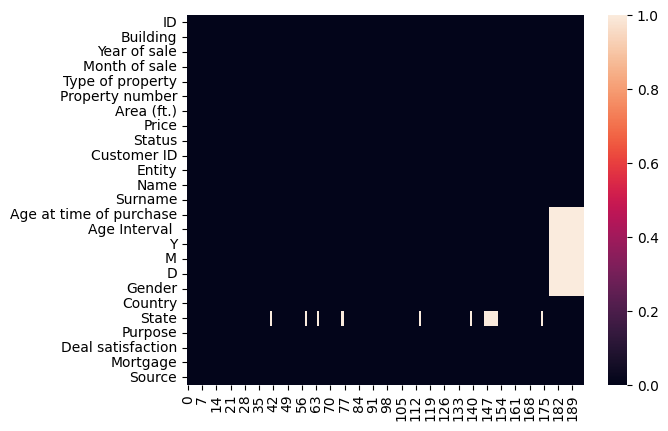

In [218]:
df.columns
sns.heatmap(df.isnull().T)

Some states are filled with NaN, I fell it would be beter if I change this to "Unknown'

<Axes: >

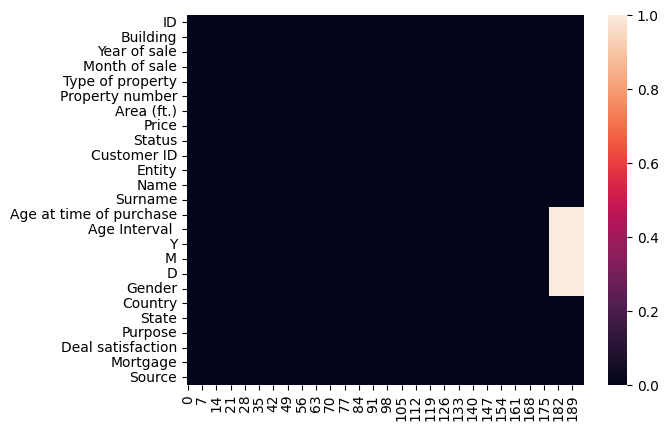

In [219]:
df.Source.unique()
df['State'].fillna('Unknown', inplace=True)
sns.heatmap(df.isnull().T)

now this looks better, let's see what the matter with birth date and age group of last ~15 observation

In [220]:
pd.options.display.max_columns = 0
df.tail(20)

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
175,3009,3,2006,5,Apartment,9,743.41,"$ 222,867.42",Sold,C0148,Individual,Myah,Roman,73.0,65+,1933.0,5.0,5.0,F,USA,California,Investment,5,Yes,Agency
176,3052,3,2006,3,Apartment,52,923.21,"$ 291,494.36",Sold,C0172,Individual,Henry,Kennedy,73.0,65+,1933.0,6.0,8.0,M,USA,California,Home,4,Yes,Agency
177,3025,3,2007,6,Apartment,25,923.21,"$ 296,483.14",Sold,C0104,Individual,Diana,Hunt,76.0,65+,1931.0,2.0,13.0,F,USA,Arizona,Home,3,No,Website
178,1005,1,2004,3,Office,5,410.71,"$ 117,564.07",Sold,C0001,Firm,Kamd,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Agency
179,1009,1,2004,11,Office,9,1200.82,"$ 317,196.40",Sold,C0012,Firm,Bridger CAL,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,Nevada,Investment,5,No,Website
180,1009,1,2004,11,Office,10,800.96,"$ 264,142.16",Sold,C0012,Firm,Bridger CAL,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,Nevada,Investment,4,No,Website
181,1011,1,2005,9,Office,11,827.87,"$ 222,947.21",Sold,C0025,Firm,Abdiel,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,Nevada,Investment,5,Yes,Website
182,1007,1,2005,12,Apartment,7,775.69,"$ 250,312.53",Sold,C0029,Firm,Kenyon,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,Nevada,Investment,1,Yes,Website
183,1008,1,2005,12,Office,8,775.69,"$ 246,050.40",Sold,C0029,Firm,Kenyon,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,California,Investment,1,Yes,Website
184,2038,2,2006,10,Apartment,38,1604.75,"$ 529,317.28",Sold,C0055,Firm,Kylax,Co,NaN,NaN,NaN,NaN,NaN,NaN,USA,California,Investment,5,No,Website


Age, birth date and gender are not defined for firms that bought property. I'll keep this in mind for later if it will have any effect on further analysis

Now I'll deal with column names and data types assigned

In [221]:
df.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

Very bad column naming for analysis, lets make it easier to use in first

In [222]:
df.columns = ['ID', 'Building', 'Year_of_sale', 'Month_of_sale', 'Type_of_property',
       'Property_number', 'Area_ft', 'Price', 'Status', 'Customer_ID',
       'Entity', 'Name', 'Surname', 'Age_at_time_of_purchase', 'Age_Interval',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal_satisfaction', 'Mortgage', 'Source']

In [223]:
df[:].apply(pd.unique) # that will give us a good view for all useless columns
                       # and columns which type could be changed to better ones

ID                         [1030, 1029, 2002, 2031, 1049, 3011, 3026, 302...
Building                                                     [1, 2, 3, 4, 5]
Year_of_sale                            [2005, 2007, 2004, 2008, 2006, 2010]
Month_of_sale                        [11, 10, 7, 12, 9, 1, 6, 3, 8, 4, 5, 2]
Type_of_property                                         [Apartment, Office]
Property_number            [30, 29, 2, 31, 49, 11, 26, 23, 36, 46, 35, 56...
Area_ft                    [743.09, 756.21, 587.28, 1604.75, 1375.45, 675...
Price                      [ $ 246,172.68 ,  $ 246,331.90 ,  $ 209,280.91...
Status                                                              [ Sold ]
Customer_ID                [C0028, C0027, C0112, C0160, C0014, C0125, C01...
Entity                                                    [Individual, Firm]
Name                       [Madalyn, Lara, Donavan, Darien, Alessandra, K...
Surname                    [Mercer, Carrillo, Flowers, Dorsey, Perry, Owe...

In [287]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,195.0,2591.425641,1244.617996,1002.00,2003.50,2054.00,3048.500,5051.00
Building,195.0,2.564103,1.243434,1.00,2.00,2.00,3.000,5.00
Year_of_sale,195.0,2006.333333,1.072941,2004.00,2006.00,2007.00,2007.000,2010.00
Month_of_sale,195.0,7.271795,3.378674,1.00,4.00,8.00,10.000,12.00
Property_number,195.0,27.328205,14.830832,1.00,15.00,27.00,39.000,59.00
Area_ft,195.0,899.867128,261.489550,410.71,739.86,785.48,1075.460,1942.50
Price,195.0,269434.560923,80129.094465,117564.07,212393.25,243052.59,308550.875,529317.28
Age_at_time_of_purchase,178.0,46.151685,12.841692,19.00,37.00,45.00,55.000,76.00
Y,178.0,1960.325843,12.835575,1931.00,1950.25,1962.00,1969.750,1986.00
M,178.0,6.752809,3.450312,1.00,4.00,6.00,9.750,15.00


Reformating Price to usable format

In [343]:
df.Price = df.Price.apply(lambda x: x[3:].replace(',','')).astype(np.float64)
df.Price.head(5)

0    246172.68
1    246331.90
2    209280.91
3    452667.01
4    467083.31
Name: Price, dtype: float64

In [284]:
States_prices = df.groupby(['State'])[['Price']].median()
States_prices
df.State.value_counts()

State
California    119
Nevada         17
Unknown        14
Arizona        11
Oregon         11
Colorado       11
Utah            6
Virginia        4
Kansas          1
Wyoming         1
Name: count, dtype: int64

In [300]:
df.Purpose.value_counts()

Purpose
Home          119
Investment     76
Name: count, dtype: int64

In [320]:
print(df.Mortgage.value_counts())
print()
print(df['Type_of_property'].value_counts())

Mortgage
No     134
Yes     61
Name: count, dtype: int64

Type_of_property
Apartment    188
Office         7
Name: count, dtype: int64


In [322]:
df.Entity.value_counts()

Entity
Individual    178
Firm           17
Name: count, dtype: int64

<Axes: >

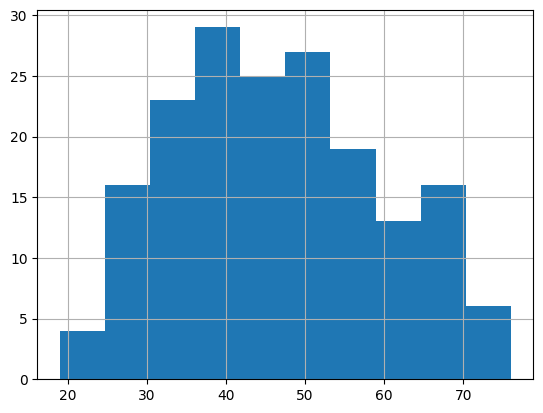

In [351]:
df.Age_at_time_of_purchase.hist()

In [327]:
df.Gender.value_counts()

Index(['ID', 'Building', 'Year_of_sale', 'Month_of_sale', 'Type_of_property',
       'Property_number', 'Area_ft', 'Price', 'Status', 'Customer_ID',
       'Entity', 'Name', 'Surname', 'Age_at_time_of_purchase', 'Age_Interval',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal_satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [328]:
df.Deal_satisfaction.value_counts()

Deal_satisfaction
5    72
3    39
4    39
2    25
1    20
Name: count, dtype: int64

In [329]:
df.Building.value_counts()

Building
2    54
3    53
1    46
4    23
5    19
Name: count, dtype: int64

In [330]:
df.Source.value_counts()

Source
Website    119
Agency      59
Client      17
Name: count, dtype: int64

In [340]:
df.Area_ft.median()
df.pivot_table(index='Building', values='Area_ft',aggfunc=np.mean)

,Area_ft
Building,
1,927.085217
2,922.192037
3,870.257170
4,933.577826
5,812.309474


I cannot understand what "building" stands for, because with increasing "building" average area is decreasing, for me it meant that it is not number of rooms in apartments. So I will just state the fact that most of our custumers buys 1-3 "bulding" property

### Conclusion

Our mean custumer is male individual from California, who found us via website, and about 46 years old at the time of purhase and buying property without mortgage. Purpose of purchase for mean client is place to live in (home), and type of propery is Apartment, with 1-3 "building" and total area of 785.48 ft^2(~72 m^2). And he is pretty satisfied with his deal.